<a href="https://colab.research.google.com/github/Kartheek-reddy1/NLP_2024-25/blob/main/NLP_Ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




In [3]:

# Load the dataset (replace with your Kaggle data)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])
data = data.values



In [4]:

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [5]:

# Function to create a time-series dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [6]:

# Define time step (how many past time points are used for prediction)
time_step = 10
X, y = create_dataset(scaled_data, time_step)


In [7]:
# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


In [8]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(100, input_shape=(time_step, 1), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)



Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - loss: 0.0822 - val_loss: 0.1249
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0288 - val_loss: 0.0271
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0137 - val_loss: 0.0373
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0178 - val_loss: 0.0260
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0114 - val_loss: 0.0234
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0087 - val_loss: 0.0336
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - val_loss: 0.0331
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0115 - val_loss: 0.0260
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0080 - val_loss: 0.0216
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0061 - val_loss: 0.0226
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0073 - val_loss: 0.0248
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0076 - val_loss: 0.0237


In [11]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0279
Test Loss: 0.027890324592590332


In [12]:
# Predict the test dataset
predicted = model.predict(X_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


In [13]:

# Inverse transform the predictions and actual values to compare
predicted = scaler.inverse_transform(predicted)
y_test_scaled = scaler.inverse_transform([y_test])



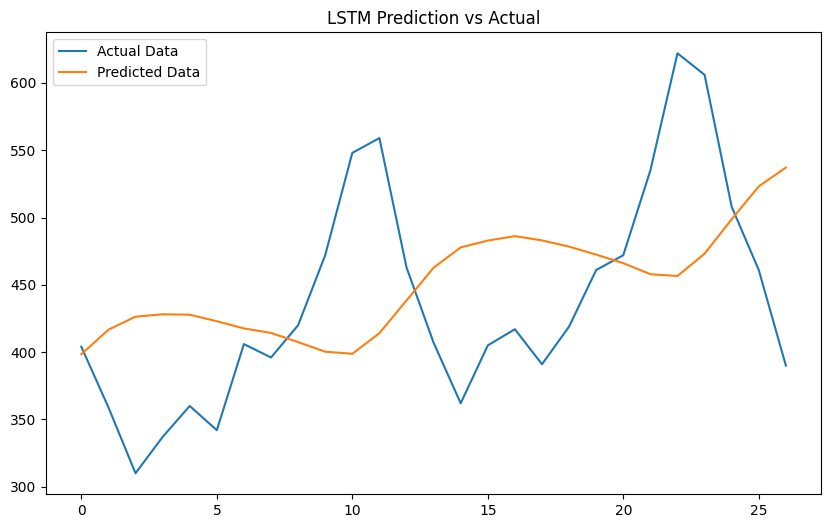

In [14]:

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_scaled[0], label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.show()